In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('troop_movements.csv')

display(data)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld
0,2024-07-10 13:29:43,1,tie_silencer,resistance,5,4,2,9,Chandrila
1,2024-07-10 13:29:42,2,resistance_soldier,empire,5,5,5,1,Bestine IV
2,2024-07-10 13:29:41,3,at-st,resistance,3,2,4,2,Socorro
3,2024-07-10 13:29:40,4,stormtrooper,empire,2,9,9,4,Kalee
4,2024-07-10 13:29:39,5,at-at,resistance,9,4,7,9,Tholoth
...,...,...,...,...,...,...,...,...,...
995,2024-07-10 13:13:08,996,x-wing,empire,5,1,10,10,Ojom
996,2024-07-10 13:13:07,997,at-at,empire,6,6,7,10,Malastare
997,2024-07-10 13:13:06,998,x-wing,resistance,6,3,2,2,Trandosha
998,2024-07-10 13:13:05,999,tie_fighter,empire,8,8,8,2,Champala


In [11]:
empire_or_resistance_data = data.groupby("empire_or_resistance").size()
print(empire_or_resistance_data)

empire_or_resistance
empire        512
resistance    488
dtype: int64


In [12]:
characters_by_homeworld_data = data.groupby("homeworld").size()
print(characters_by_homeworld_data)

homeworld
Alderaan        28
Aleen Minor     28
Bestine IV      13
Cerea           27
Champala        29
Chandrila       38
Concord Dawn    21
Corellia        18
Dagobah         31
Dathomir        14
Dorin           28
Eriadu          31
Glee Anselm     20
Haruun Kal      22
Iktotch         13
Iridonia        22
Kalee           24
Kashyyyk        28
Malastare       18
Mirial          33
Mon Cala        15
Muunilinst      26
Naboo           22
Ojom            27
Quermia         16
Rodia           25
Ryloth          31
Serenno         31
Shili           26
Skako           24
Socorro         26
Stewjon         16
Sullust         22
Tatooine        28
Tholoth         22
Toydaria        28
Trandosha       24
Troiken         21
Tund            23
Umbara          23
Vulpter         17
Zolan           21
dtype: int64


In [13]:
characters_by_unit_type = data.groupby("unit_type").size()
print(characters_by_unit_type)

unit_type
at-at                 124
at-st                 137
resistance_soldier    123
stormtrooper          130
tie_fighter           120
tie_silencer          123
unknown               128
x-wing                115
dtype: int64


In [14]:
data['is_resistance'] = data['empire_or_resistance'] == 'resistance'
display(data)

,timestamp,unit_id,unit_type,empire_or_resistance,location_x,location_y,destination_x,destination_y,homeworld,is_resistance
0,2024-07-10 13:29:43,1,tie_silencer,resistance,5,4,2,9,Chandrila,True
1,2024-07-10 13:29:42,2,resistance_soldier,empire,5,5,5,1,Bestine IV,False
2,2024-07-10 13:29:41,3,at-st,resistance,3,2,4,2,Socorro,True
3,2024-07-10 13:29:40,4,stormtrooper,empire,2,9,9,4,Kalee,False
4,2024-07-10 13:29:39,5,at-at,resistance,9,4,7,9,Tholoth,True
...,...,...,...,...,...,...,...,...,...,...
995,2024-07-10 13:13:08,996,x-wing,empire,5,1,10,10,Ojom,False
996,2024-07-10 13:13:07,997,at-at,empire,6,6,7,10,Malastare,False
997,2024-07-10 13:13:06,998,x-wing,resistance,6,3,2,2,Trandosha,True
998,2024-07-10 13:13:05,999,tie_fighter,empire,8,8,8,2,Champala,False


<Axes: xlabel='empire_or_resistance'>

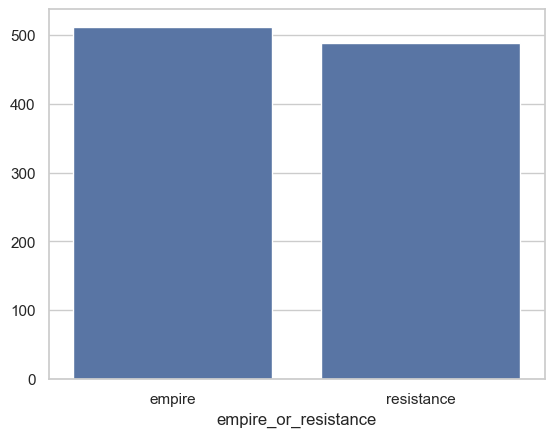

In [15]:
import seaborn as sns
sns.set_theme(style="whitegrid")

sns.barplot(empire_or_resistance_data)


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

feature_cols = ["homeworld", "unit_type"]
encoded_data = pd.get_dummies(data,columns=feature_cols,drop_first=False)
display(encoded_data)

feature_cols = ["homeworld*", "unit_type*"]
X = encoded_data[feature_cols] # features
y = encoded_data["is_resistance"] # target

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


display(X)

,timestamp,unit_id,empire_or_resistance,location_x,location_y,destination_x,destination_y,is_resistance,homeworld_Alderaan,homeworld_Aleen Minor,...,homeworld_Vulpter,homeworld_Zolan,unit_type_at-at,unit_type_at-st,unit_type_resistance_soldier,unit_type_stormtrooper,unit_type_tie_fighter,unit_type_tie_silencer,unit_type_unknown,unit_type_x-wing
0,2024-07-10 13:29:43,1,resistance,5,4,2,9,True,False,False,...,False,False,False,False,False,False,False,True,False,False
1,2024-07-10 13:29:42,2,empire,5,5,5,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2,2024-07-10 13:29:41,3,resistance,3,2,4,2,True,False,False,...,False,False,False,True,False,False,False,False,False,False
3,2024-07-10 13:29:40,4,empire,2,9,9,4,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,2024-07-10 13:29:39,5,resistance,9,4,7,9,True,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2024-07-10 13:13:08,996,empire,5,1,10,10,False,False,False,...,False,False,False,False,False,False,False,False,False,True
996,2024-07-10 13:13:07,997,empire,6,6,7,10,False,False,False,...,False,False,True,False,False,False,False,False,False,False
997,2024-07-10 13:13:06,998,resistance,6,3,2,2,True,False,False,...,False,False,False,False,False,False,False,False,False,True
998,2024-07-10 13:13:05,999,empire,8,8,8,2,False,False,False,...,False,False,False,False,False,False,True,False,False,False


KeyError: "None of [Index(['homeworld*', 'unit_type*'], dtype='object')] are in the [columns]"